# Análisis y Reporte sobre el desempeño del modelo - Valhalla

## Librerías

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

## Lectura de Datos

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
df = pd.read_csv("Valhalla23.csv")
df.head()

,Celsius,Valks
0,61.4720,-139.740
1,70.5790,-156.600
2,-7.3013,73.269
3,71.3380,-165.420
4,43.2360,-75.835


## Preparación de los Datos

Se define una semilla

In [4]:
seed = 8621
np.random.seed(seed)

Se divide el set de datos en entrenamiento (40%),  validación (40%), y prueba (20%), utilizando el método train_test_split. y la semilla definida arriba

In [5]:
train_size = 0.4
test_size = 0.2

Se separan los datos en nuestra variable predictora (X) y nuestra variable objetivo (y)

In [6]:
X = df[['Celsius']]
y = df['Valks']

Para poder dividir el set en 40% entrenamiento, 40% validación y 20% prueba primero se utiliza train_test_split para asignar el 40% de los datos al conjunto de entrenamiento y el 60% restante se asigna a un conjunto temporal, después se utiliza nuevamente train_test_split en donde tomamos el conjunto temporal  y lo dividimos de tal forma que el conjunto de prueba reciba el 20% de los datos originales (1/3 del conjunto temporal) y el conjunto de validación el 40% de los datos originales.

In [7]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_size, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size/(1-train_size), random_state=seed)

## Modelo Base: Entrenamiento y Evaluación

Se entrena un modelo base de tipo SGDRegressor con una tasa de aprendizaje constante de 1E-4 y un máximo de iteraciones de un millón. Este modelo se utiliza como referencia para comparar los resultados de modelos entrenados con diferentes tamaños de muestra.

In [8]:
base_model = SGDRegressor(learning_rate='constant', eta0=1e-4, max_iter=1000000, random_state=seed)
base_model.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=1000000,
             random_state=8621)

Calculo del error cuadrático medio para este modelo, sobre los datos de entrenamiento, validación, y prueba. **Estos datos serán la línea base**

In [9]:
mse_train_base = mean_squared_error(y_train, base_model.predict(X_train))
mse_val_base = mean_squared_error(y_val, base_model.predict(X_val))
mse_test_base = mean_squared_error(y_test, base_model.predict(X_test))
print("Error cuadrático medio dobre los datos de entrenamiento", mse_train_base)
print("Error cuadrático medio dobre los datos de validación", mse_val_base)
print("Error cuadrático medio dobre los datos de prueba", mse_test_base)

Error cuadrático medio dobre los datos de entrenamiento 999.3010293240701
Error cuadrático medio dobre los datos de validación 1172.940029051852
Error cuadrático medio dobre los datos de prueba 1287.3295336780816


* MSE - Entrenamiento: Muestra el error promedio del modelo al predecir los datos de entrenamiento. Como este conjunto de datos se usó para ajustar el modelo, es normal que el MSE sea relativamente bajo en comparación con los otros conjuntos. Sin embargo, el MSE no es extremadamente bajo, lo que indica que el modelo no se está sobreajustando del todo a los datos de entrenamiento. Esto podría significar que el modelo está generalizando de manera razonable en los datos de entrenamiento, pero hay margen para mejorar el ajuste y debe analizarse en conjunto con los demás resultados.

* MSE - Validación: Es más alto que en el conjunto de entrenamiento. Esto sugiere que el modelo tiene una capacidad de generalización limitada y que hay una mayor discrepancia entre las predicciones del modelo y los datos reales cuando se trata de datos no vistos. El aumento del error en comparación con el conjunto de entrenamiento puede deberse a una combinación de varianza y sesgo. Es decir, el modelo puede estar aprendiendo algunos patrones específicos de los datos de entrenamiento que no son tan útiles en datos no vistos.

* MSE - Prueba: Es aún mayor que en los conjuntos de entrenamiento y validación. Este es un indicador importante de que el modelo no está generalizando bien cuando se enfrenta a datos completamente nuevos. Este aumento sugiere que puede haber un problema de sobreajuste (si el modelo es demasiado complejo) o un problema de sesgo alto (si el modelo es demasiado simple y no captura suficientemente la complejidad de los datos).

Conclusión: A medida que pasamos del conjunto de entrenamiento al de validación y finalmente al de prueba, el MSE aumenta constantemente. Esta tendencia generalmente indica que el modelo puede estar ligeramente sobreajustado a los datos de entrenamiento, pero también puede estar subajustado si no captura adecuadamente la complejidad de los datos.

Gráfica donde se muestra cada subconjunto de datos (entrenamiento, validación, prueba) y el modelo de regresión obtenido (como una recta)

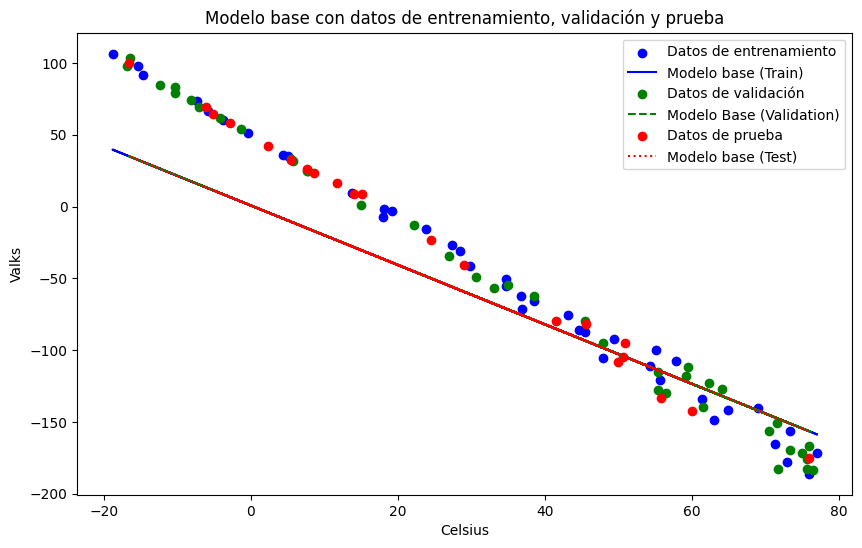

In [10]:
plt.figure(figsize=(10, 6))

# Entrenamiento
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.plot(X_train, base_model.predict(X_train), color='blue', label='Modelo base (Train)')

# Validación
plt.scatter(X_val, y_val, color='green', label='Datos de validación')
plt.plot(X_val, base_model.predict(X_val), color='green', linestyle='dashed', label='Modelo Base (Validation)')

# Prueba
plt.scatter(X_test, y_test, color='red', label='Datos de prueba')
plt.plot(X_test, base_model.predict(X_test), color='red', linestyle='dotted', label='Modelo base (Test)')

plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.legend()
plt.title('Modelo base con datos de entrenamiento, validación y prueba')
plt.show()

 Las rectas de regresión sugieren que el modelo no es completamente incapaz de capturar la tendencia general de los datos, pero existe un sesgo inherente debido a que el modelo puede ser demasiado simple. Se resalta la necesidad de ajustar el modelo o modificar la cantidad de datos de entrenamiento utilizados.

Creación de una lista de 20 elementos enteros entre 2 y 39, incluyendo el número 2 y sin repeticiones.

In [11]:
sample_sizes = sorted(np.random.choice(range(2, 40), size=19, replace=False).tolist() + [2])
sample_sizes

[2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 16, 18, 21, 23, 24, 26, 28, 36, 38]

Para cada uno de los tamaño de muestra definido en sample_sizes se entrenan 100 modelos. Para cada modelo, se selecciona un subconjunto aleatorio del set de entrenamiento que contenga esa cantidad de muestras.

Para cada uno de los modelos, se calcula el error cuadrático medio en el subconjunto de entrenamiento (el que tiene un número cambiante de muestras), y en el subconjunto de validación

Se calcula el promedio de las 100 repeticiones para cada uno de los modelos y sus errores. Esto genera dos listas de 20 valores cada uno, donde cada elemento representa el error promedio de las 100 repeticiones que se hicieron para cada subconjunto de entrenamiento

In [12]:
train_mse_list = [] # MSE promedio en los subconjuntos de entrenamiento.
val_mse_list = [] # MSE promedio en el conjunto de validación.

for size in sample_sizes: # Se recorre cada tamaño de muestra en sample_size
    train_mse_reps = [] # MSE de las 100 repeticiones para el conjunto de entrenamiento.
    val_mse_reps = [] # MSE de las 100 repeticiones para el conjunto de validación

    for _ in range(100):  # Para realizar las 100 repeticiones de entrenamiento con subconjuntos aleatorios.
        # Se selecciona un subconjunto aleatorio de los datos de entrenamiento
        subset_indices = np.random.choice(len(X_train), size=size, replace=False) # Seleccion de size indices (posiciones) aleatorios de los datos de
        #entrenamiento / len(X_train): Especifica el rango de donde se seleccionan los índices, que aquí corresponde al total de filas en X_train
        X_subset = X_train.iloc[subset_indices] #Extrae las filas correspondientes a esos índices
        y_subset = y_train.iloc[subset_indices]

        # Se entrena el modelo en este subconjunto.
        model = SGDRegressor(learning_rate='constant', eta0=1e-4, max_iter=1000000, random_state=seed)
        model.fit(X_subset, y_subset)

        # Se alcula MSE en el subconjunto (entrenamiento) y en el conjunto de validación completo
        train_mse_reps.append(mean_squared_error(y_subset, model.predict(X_subset))) #  MSE en el subconjunto de entrenamiento
        val_mse_reps.append(mean_squared_error(y_val, model.predict(X_val)))

    # Promedio de la MSE sobre las 100 repeticiones.
    train_mse_list.append(np.mean(train_mse_reps))
    val_mse_list.append(np.mean(val_mse_reps))

In [13]:
print("Lista de MSE promedio en entrenamiento:", train_mse_list)
print("Lista de MSE promedio en validación:", val_mse_list)

Lista de MSE promedio en entrenamiento: [np.float64(25.611804414171974), np.float64(25.509789926182325), np.float64(56.082605734285316), np.float64(728.21807271561), np.float64(905.0089594908708), np.float64(96.36185877145785), np.float64(895.5438054962938), np.float64(882.8030648723754), np.float64(908.8067502763356), np.float64(956.1773214923176), np.float64(1007.3037852033686), np.float64(1017.359089218815), np.float64(1029.312190564283), np.float64(1026.019695417866), np.float64(1053.7067121610214), np.float64(1022.1862321729445), np.float64(1018.7160108257771), np.float64(1010.8541773113741), np.float64(1011.36829778634), np.float64(998.4921251712389)]
Lista de MSE promedio en validación: [np.float64(1452.1543265449075), np.float64(266.93614151554794), np.float64(195.01823664163882), np.float64(1098.5845395112983), np.float64(1171.3547431908144), np.float64(147.1165531152293), np.float64(1141.9706413414344), np.float64(1118.5230272849037), np.float64(1132.1125799315714), np.float6

Se agregan a las listas anteriores los errores de entrenamiento y validación de la línea base

In [14]:
train_mse_list.append(mse_train_base)
val_mse_list.append(mse_val_base)

Gráfica donde se muestre la evolución del error promedio de entrenamiento y validación, para cada uno de los diferentes tamaños de entrenamiento.

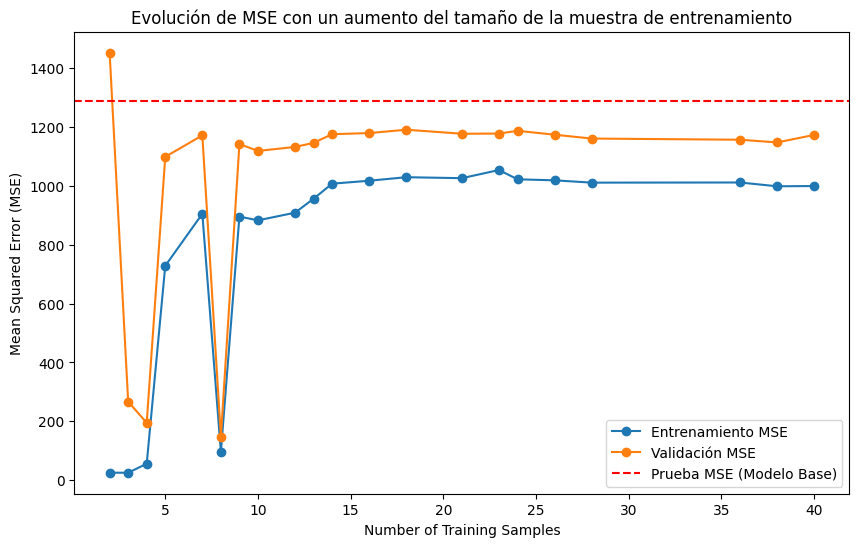

In [15]:
# 11. Plot the evolution of the training and validation MSEs
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes + [len(X_train)], train_mse_list, label='Entrenamiento MSE', marker='o')
plt.plot(sample_sizes + [len(X_train)], val_mse_list, label='Validación MSE', marker='o')
plt.axhline(y=mse_test_base, color='red', linestyle='--', label='Prueba MSE (Modelo Base)')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('Evolución de MSE con un aumento del tamaño de la muestra de entrenamiento')
plt.show()

## Análisis de Resultados

El primero modelo (2 muestras) tiende a sobreajustarse a los pocos datos de entrenamiento, mostrando un bajo MSE en entrenamiento pero en validación indicando alta varianza, mientras que el modelo con 40 muestras tiene un ajuste más eqilibrado con un MSE más estable tanto en el conjunto de entrenamiento como en el de validación, aunque el MSE de entrenamiento es un más alto que en el modelo de menor tamaño, el MSE de validación es más bajo y estable, indicando un mejor balance entre sesgo y varianza.

* En los modelos de 2 a 10 muestras existe una alta varianza y un bajo sesgo, Se ajustan demasiado a los datos específicos de entrenamiento y no generalizan bien.
* A medida que el número de muestras de entrenamiento aumenta en el rango de 10 a 30, hay una transición gradual en el comportamiento de los modelos en términos de sesgo y varianza
* En los modelos de 10 a 20 todavía están en una fase de alta varianza, aunque menos extrema que en los casos de 2 a 10 muestras, tienen más datos para aprender patrones generales, lo que significa que empiezan a capturar mejor las tendencias subyacentes de los datos sin depender demasiado de las peculiaridades del conjunto de entrenamiento, sin embargo, debido a que el tamaño de las muestras sigue siendo relativamente pequeño, todavía se observa una cierta cantidad de varianza.
* En los modelos de 20 a 30 se observa un comportamiento más equilibrado entre sesgo y varianza.tienen suficiente información para capturar patrones subyacentes más robustos y minimizar los efectos del ruido en los datos de entrenamiento. Esto lleva a una reducción progresiva de la varianza en comparación con los modelos entrenados con menos de 20 muestras, el sesgo también disminuye porque el modelo tiene más ejemplos para aprender patrones generalizables en lugar de ajustar demasiado el ruido de los datos, sin embargo, el modelo aún no ha alcanzado el nivel de complejidad que podría llevar a un sobreajuste significativo.
* En los modelos con muestras de 30 a 40 existe una menor varianza, pero potencialmente más sesgo en comparación con modelos de alta varianza. Sin embargo, un tamaño de muestra como 30 o 40 ofrece un buen equilibrio.

Según las gráficas, el MSE en el conjunto de validación comienza a estabilizarse cuando se utilizan aproximadamente 30 muestras. Este parece ser un buen punto de equilibrio entre el sesgo y la varianza, por lo que 30 muestras parecen ser una opción adecuada para el entrenamiento del modelo.

Entrenamiento de un nuevo modelo utilizando la cantidad de muestras más adecuada de muestras (30).

Calculo de su error cuadrático medio sobre el subconjunto de entrenamiento (el de la cantidad de muestras seleccionadas), el de validación, y el de prueba.

In [16]:
# Se seleccionan 30 muestras del conjunto de entrenamiento
final_size = 30
final_subset_indices = np.random.choice(len(X_train), size=final_size, replace=False)
X_final_subset = X_train.iloc[final_subset_indices]
y_final_subset = y_train.iloc[final_subset_indices]

# Entrenamiento del modelo
final_model = SGDRegressor(learning_rate='constant', eta0=1e-4, max_iter=1000000, random_state=seed)
final_model.fit(X_final_subset, y_final_subset)

# Calculo del MSE en el subconjunto seleccionado, la validación y los conjuntos de prueba
mse_final_train = mean_squared_error(y_final_subset, final_model.predict(X_final_subset))
mse_final_val = mean_squared_error(y_val, final_model.predict(X_val))
mse_final_test = mean_squared_error(y_test, final_model.predict(X_test))

mse_final_train, mse_final_val, mse_final_test

(np.float64(1155.8691634021095),
 np.float64(1325.0488400434083),
 np.float64(1330.4598295355204))

## Comparación con el Modelo Base

**El modelo entrenado con 30 muestras tiene un MSE de validación y prueba significativamente mejor que el modelo base.**

Aunque los errores en el modelo base parecen bajos en comparación con los de otros modelos, la diferencia significativa entre los errores de entrenamiento y los errores de validación y prueba sugiere que el modelo podría estar sobreajustando a los datos de entrenamiento, es decir, aunque el MSE en el conjunto de validación y prueba es menor que otros modelos, no refleja una generalización adecuada debido al sobreajuste. Mientras que en el modelo entrenado con 30 muestras a pesar de que los errores de validación y prueba son más altos que los del modelo base, la diferencia entre los errores de entrenamiento, validación y prueba es mucho menor, lo que indica un mejor equilibrio entre sesgo y varianza. Este modelo no sobreajusta a los datos de entrenamiento tanto como el modelo base y muestra una mejor capacidad de generalización, por lo que la configuración de 30 muestras ofrece el mejor balance de sesgo y varianza, lo que resulta en un rendimiento robusto y consistente en datos no vistos.